Датасет состоит из : 20579 изображений, на которых изображены 120 разлчиных пород собак. Мы не знаем сколько фото относится к каждому классу поэтому распределим все фото по папкам train и test, а результаты изобразим при помощи matplotlib.

In [1]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# Пути к данным
base_dir = 'dataset'
labels_csv_path = os.path.join(base_dir, 'labels.csv')
all_images_dir = os.path.join(base_dir, 'all_images')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:

# Чтение labels.csv
labels_df = pd.read_csv(labels_csv_path)

# Разбиение данных на тренировочные, тестовые и валидационные
train_df, temp_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['breed'])  # 80% для тренировки, 20% временный
validation_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['breed'])  # Разделение временного: 50% в тест, 50% в валидацию

# Функция для создания папок и копирования изображений
def distribute_images(df, target_dir):
    for _, row in df.iterrows():
        file_name = row['id'] + '.jpg'
        breed = row['breed']
        breed_dir = os.path.join(target_dir, breed)
        
        # Создание папки для породы, если она не существует
        if not os.path.exists(breed_dir):
            os.makedirs(breed_dir)
        
        # Копирование файла
        src_path = os.path.join(all_images_dir, file_name)
        dst_path = os.path.join(breed_dir, file_name)
        shutil.copy(src_path, dst_path)

# Распределение изображений
distribute_images(train_df, train_dir)
distribute_images(test_df, test_dir)
distribute_images(validation_df, validation_dir)

print("Изображения распределены по папкам.")

Изображения распределены по папкам.


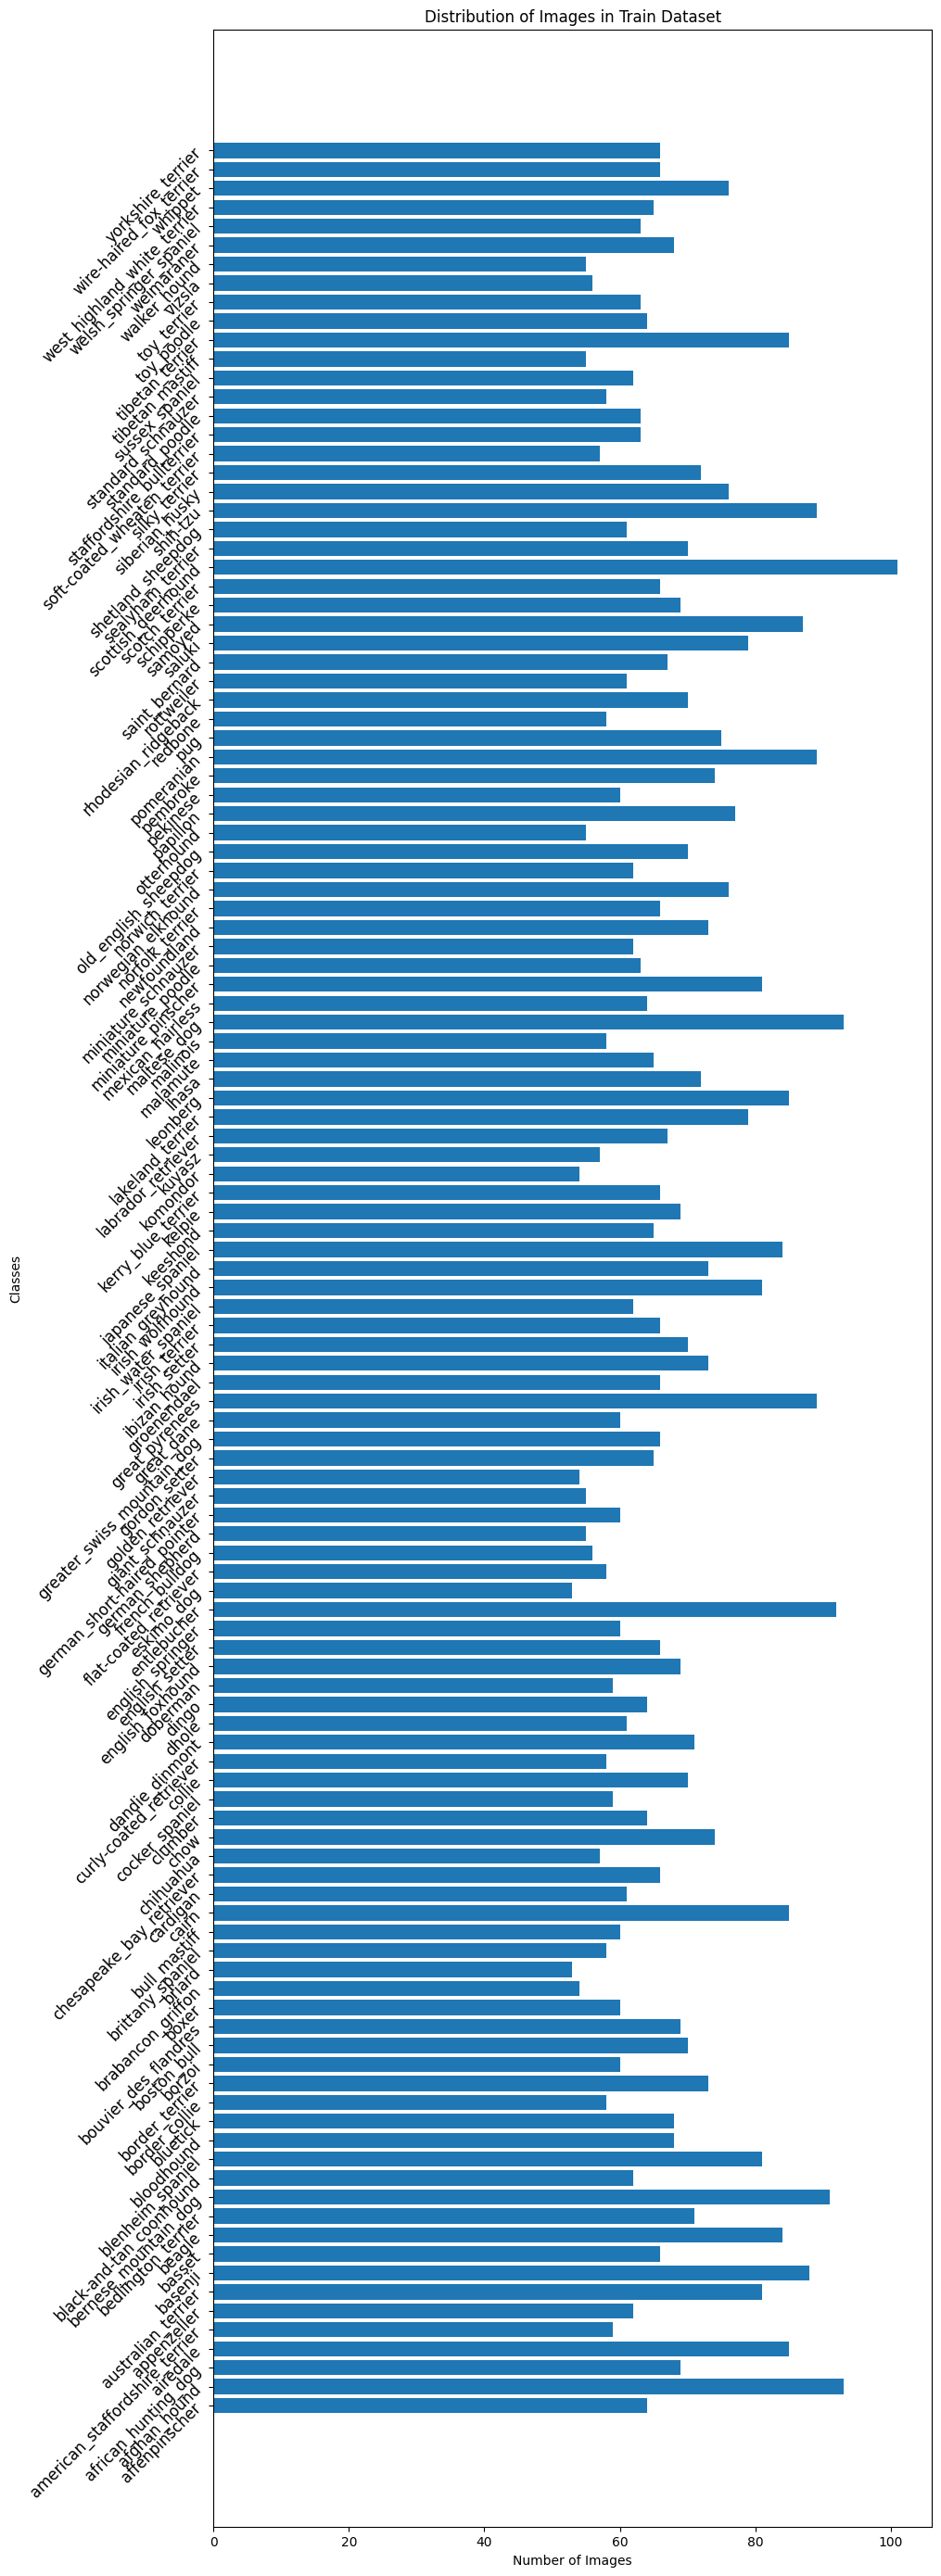

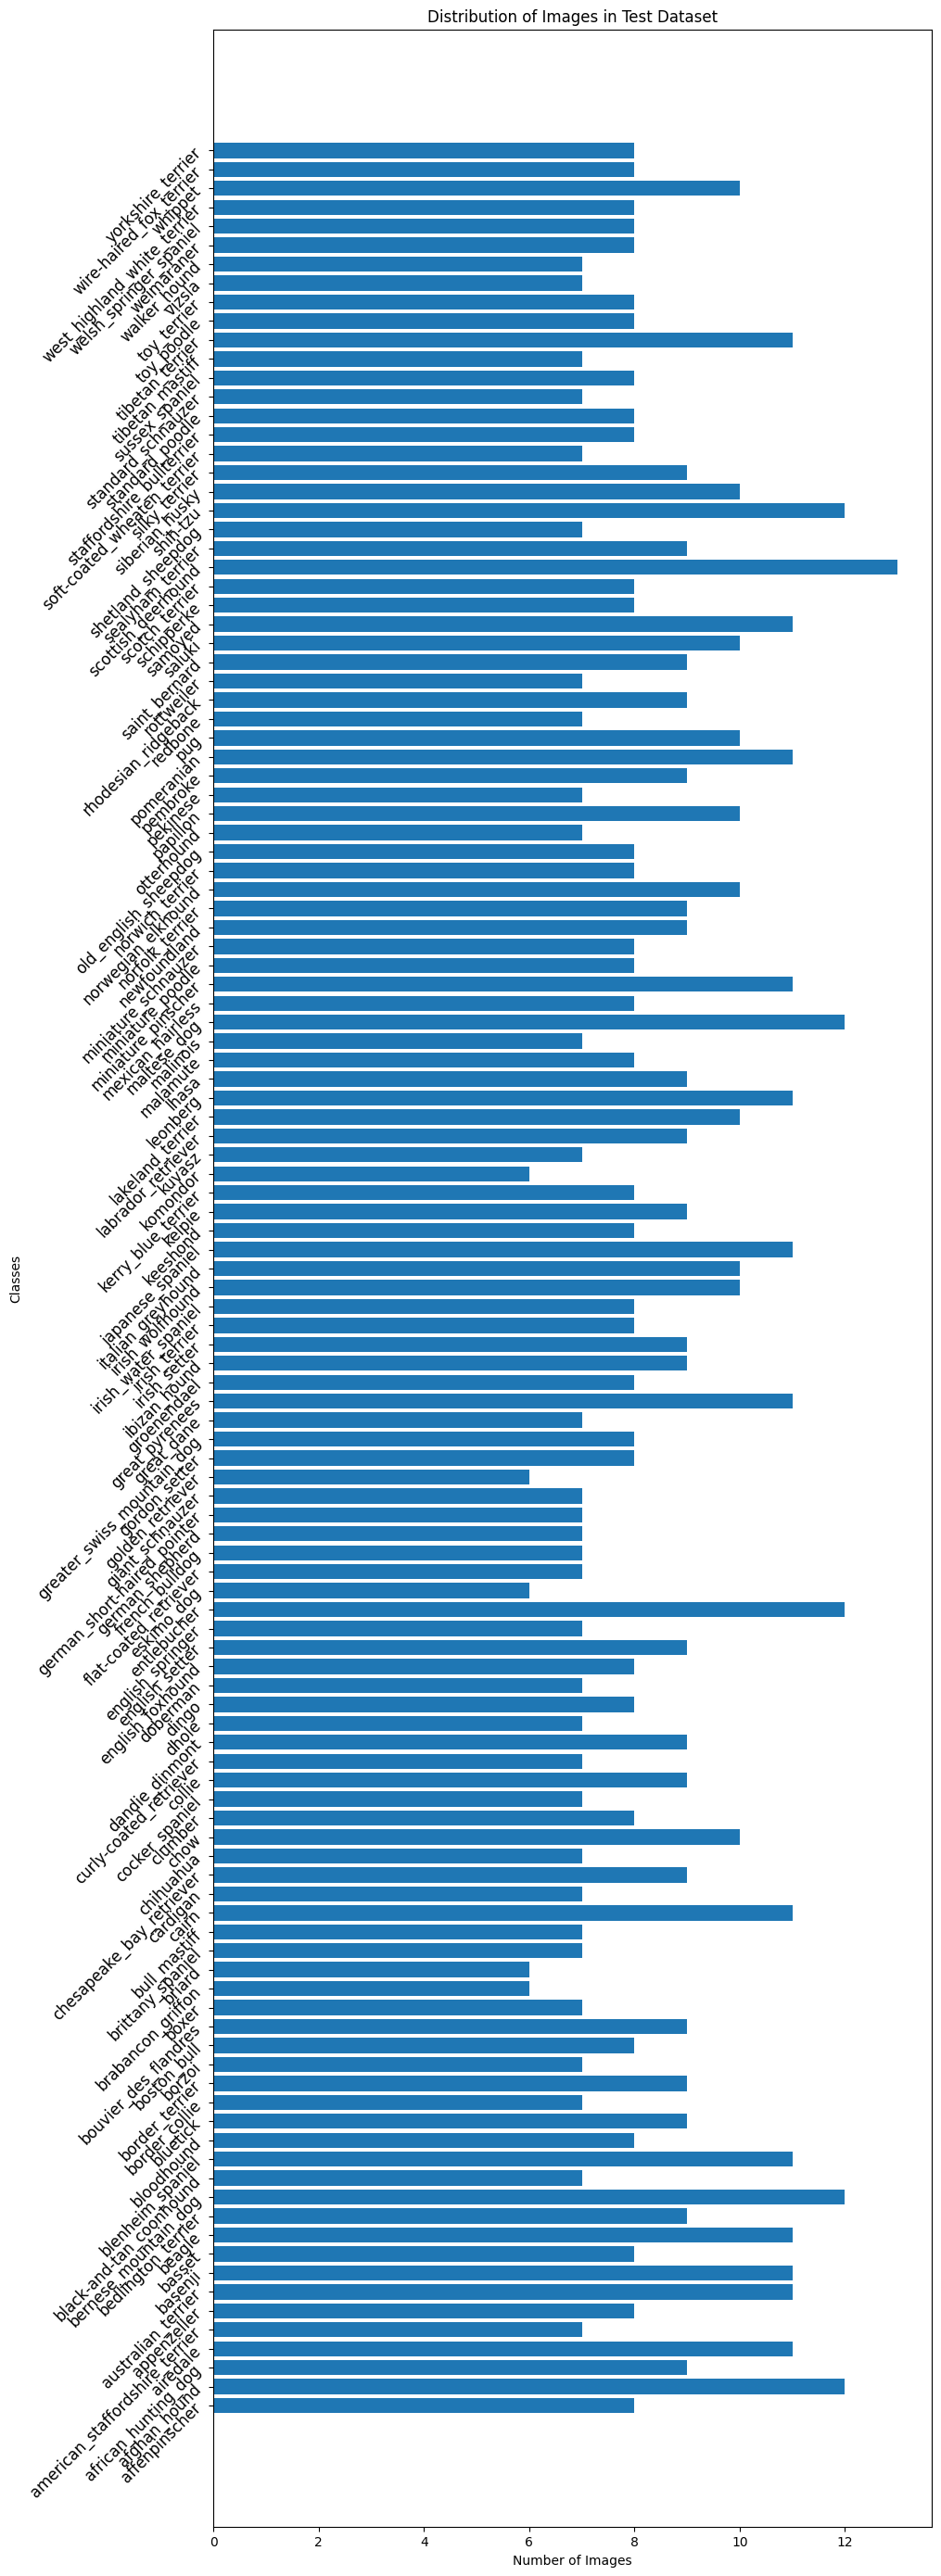

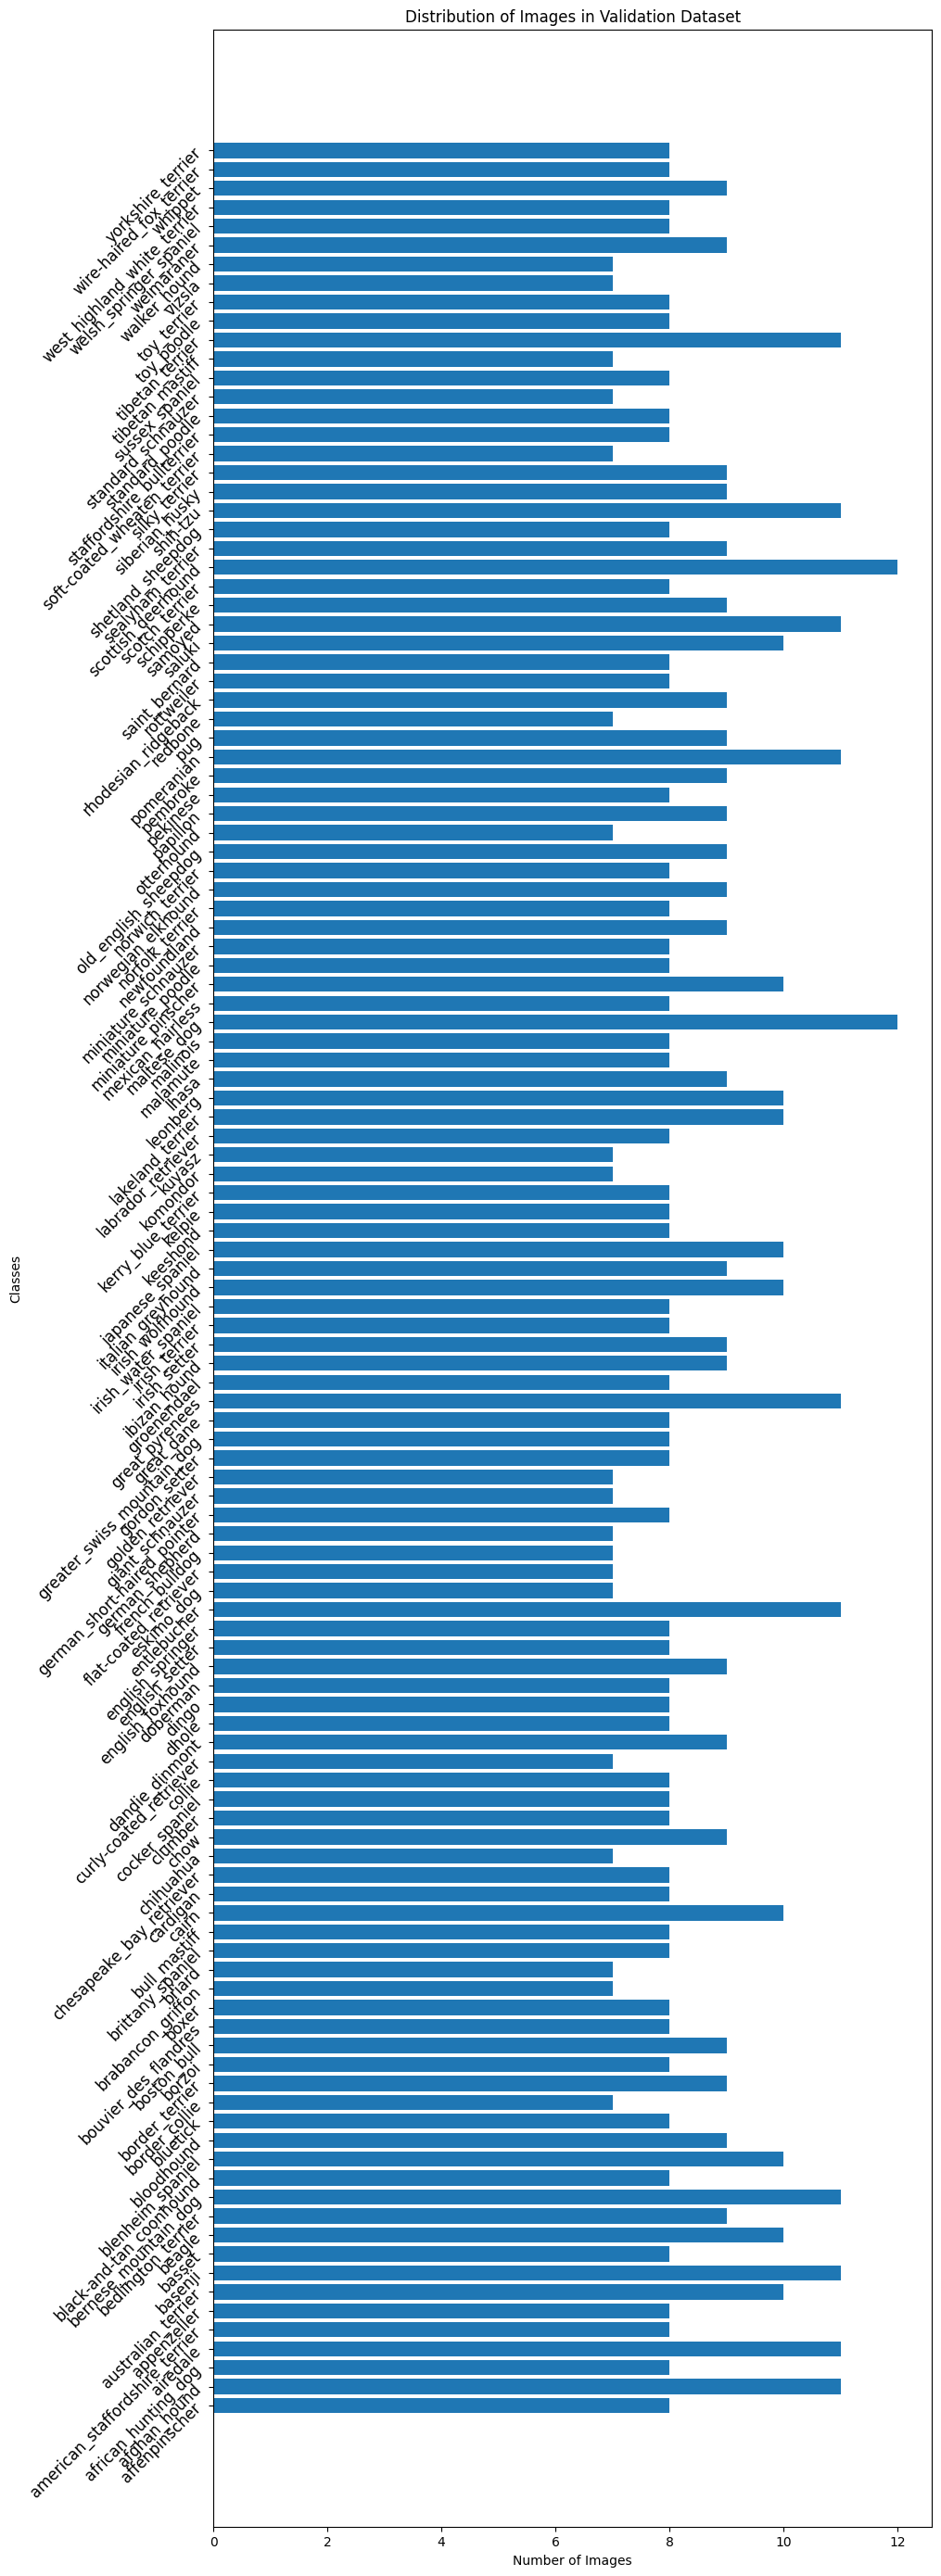

In [11]:

# Подсчет количества изображений в каждой папке
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            class_counts[class_name] = count
    return class_counts

train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)
validation_counts = count_images_per_class(validation_dir)

# Визуализация распределения изображений по классам
def plot_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 35))  # Увеличенный вертикальный размер для лучшей видимости
    plt.barh(classes, counts)
    plt.xlabel('Number of Images')
    plt.ylabel('Classes')
    plt.title(title)
    plt.yticks(rotation=45, fontsize=12)  # Поворот и изменение размера шрифта меток
    plt.show()

plot_class_distribution(train_counts, 'Distribution of Images in Train Dataset')
plot_class_distribution(test_counts, 'Distribution of Images in Test Dataset')
plot_class_distribution(validation_counts, 'Distribution of Images in Validation Dataset')

Как видно по графикам, датасет распределен не равномерно. Поэтому проведем некототорую реорганизацию.

In [6]:
import numpy as np

labels_df = pd.read_csv(labels_csv_path)

# Выбор 60 классов
selected_breeds = np.random.choice(labels_df['breed'].unique(), 60, replace=False)
labels_df = labels_df[labels_df['breed'].isin(selected_breeds)]

# Удаление содержимого папок
def clear_directory(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')

clear_directory(train_dir)
clear_directory(test_dir)
clear_directory(validation_dir)

# Определение минимального количества изображений на класс
min_count = labels_df['breed'].value_counts().min()

# Фильтрация каждого класса до min_count изображений
balanced_df = pd.DataFrame()
for breed in selected_breeds:
    breed_df = labels_df[labels_df['breed'] == breed].sample(min_count, random_state=42)
    balanced_df = pd.concat([balanced_df, breed_df])

# Разделение и распределение изображений
train_df, temp_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['breed'])
validation_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['breed'])

distribute_images(train_df, train_dir)
distribute_images(test_df, test_dir)
distribute_images(validation_df, validation_dir)

print("Изображения перераспределены по папкам с учетом новых условий.")


Изображения перераспределены по папкам с учетом новых условий.


Проведем повторные замеры

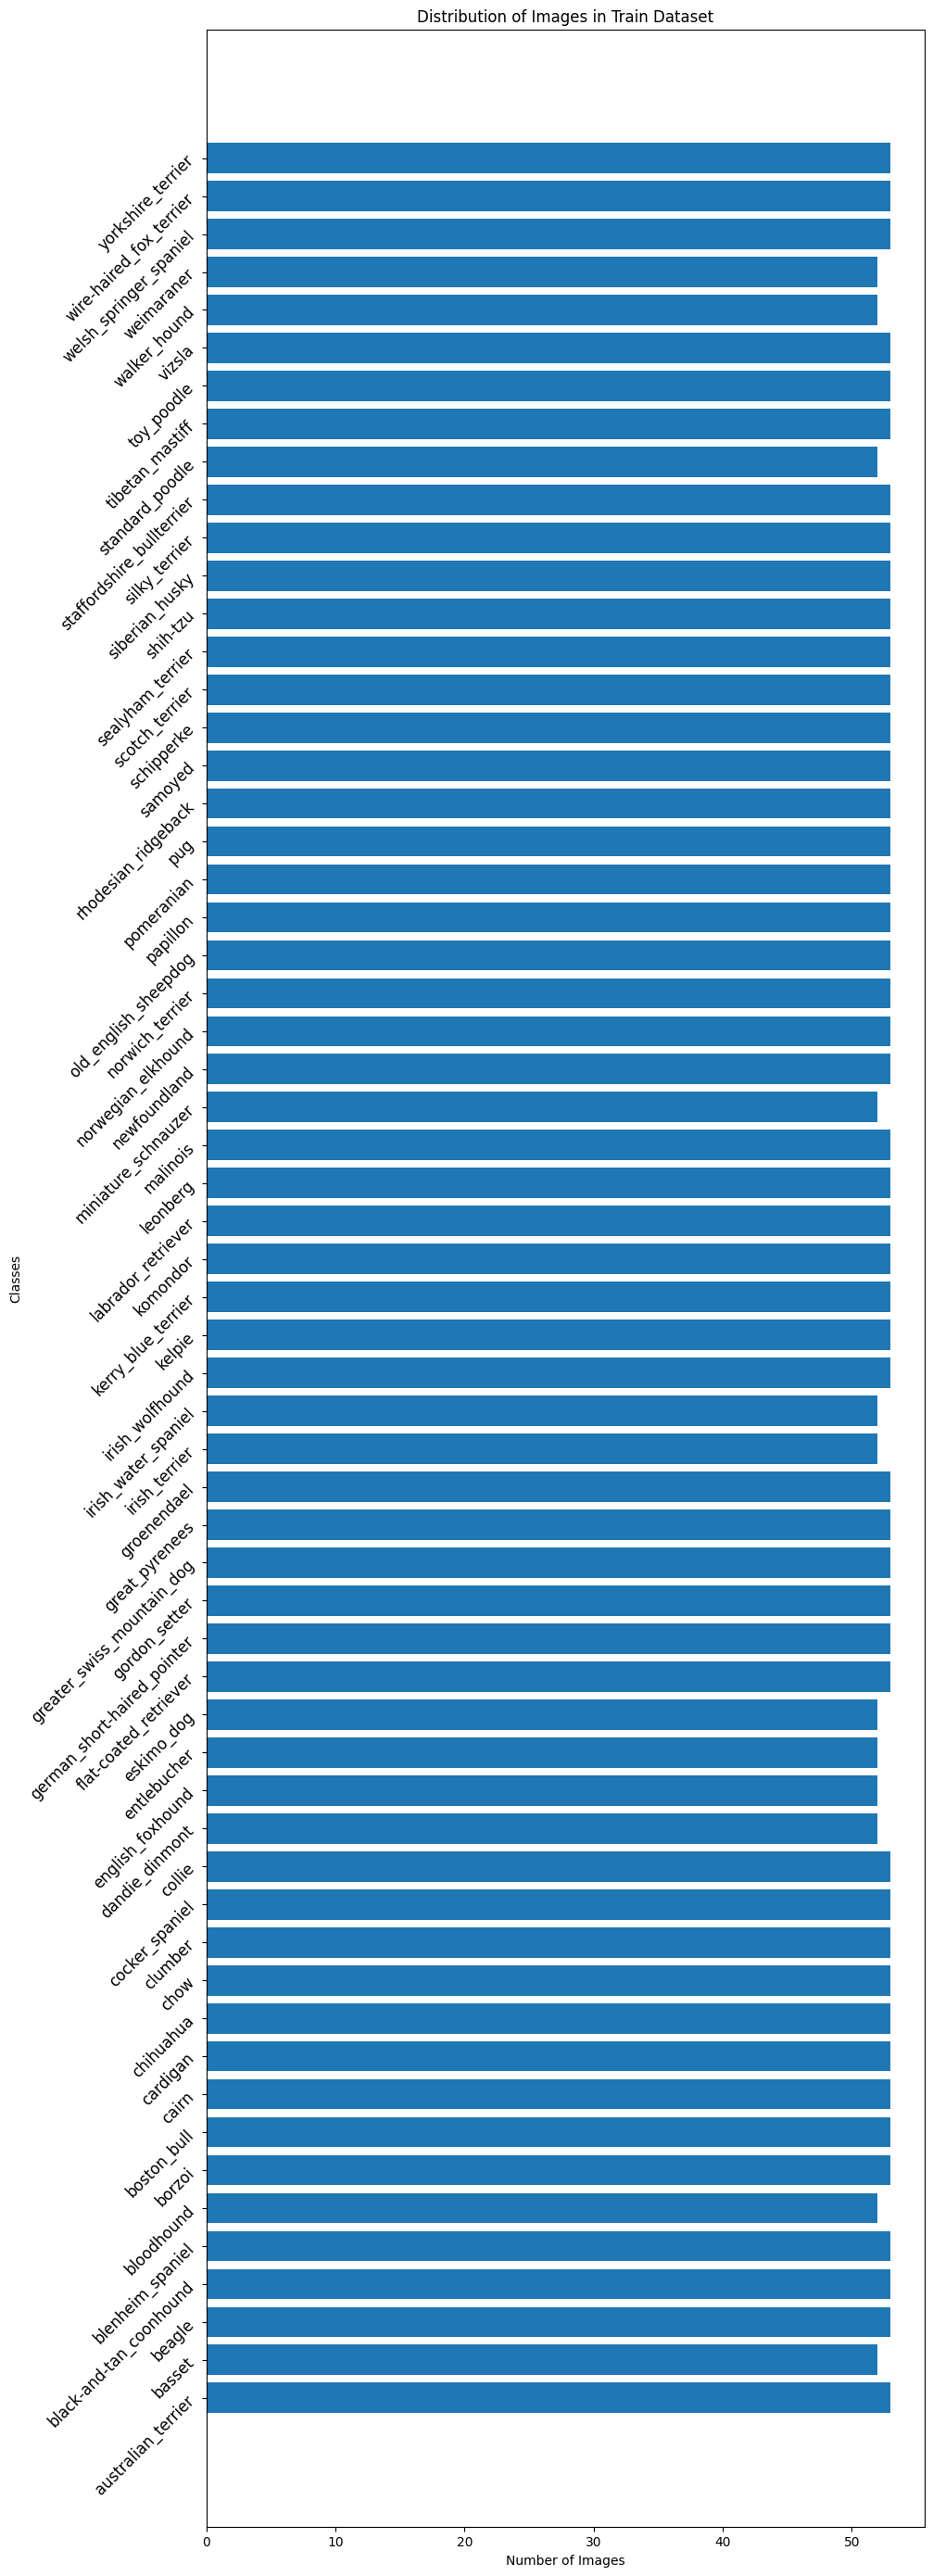

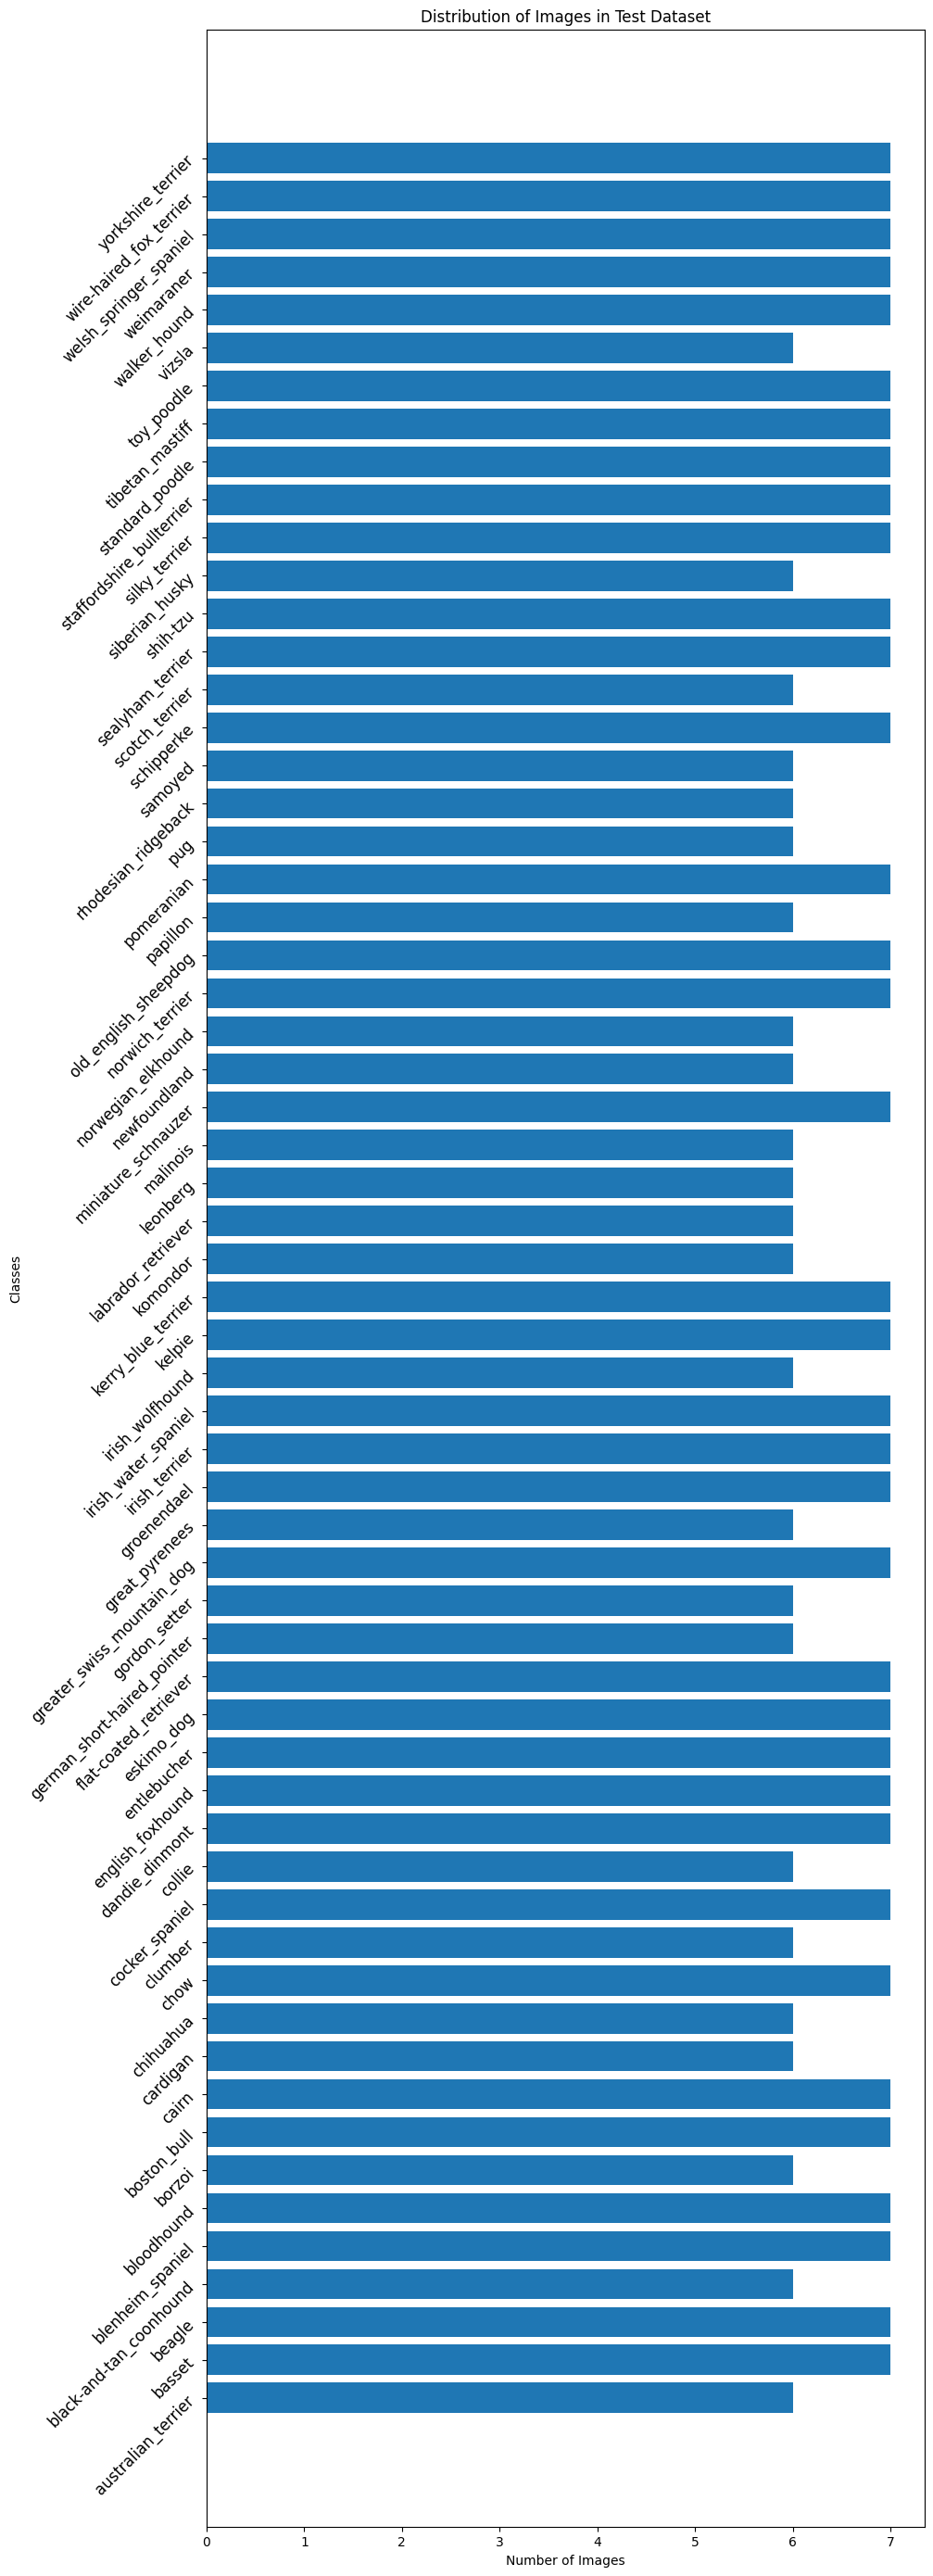

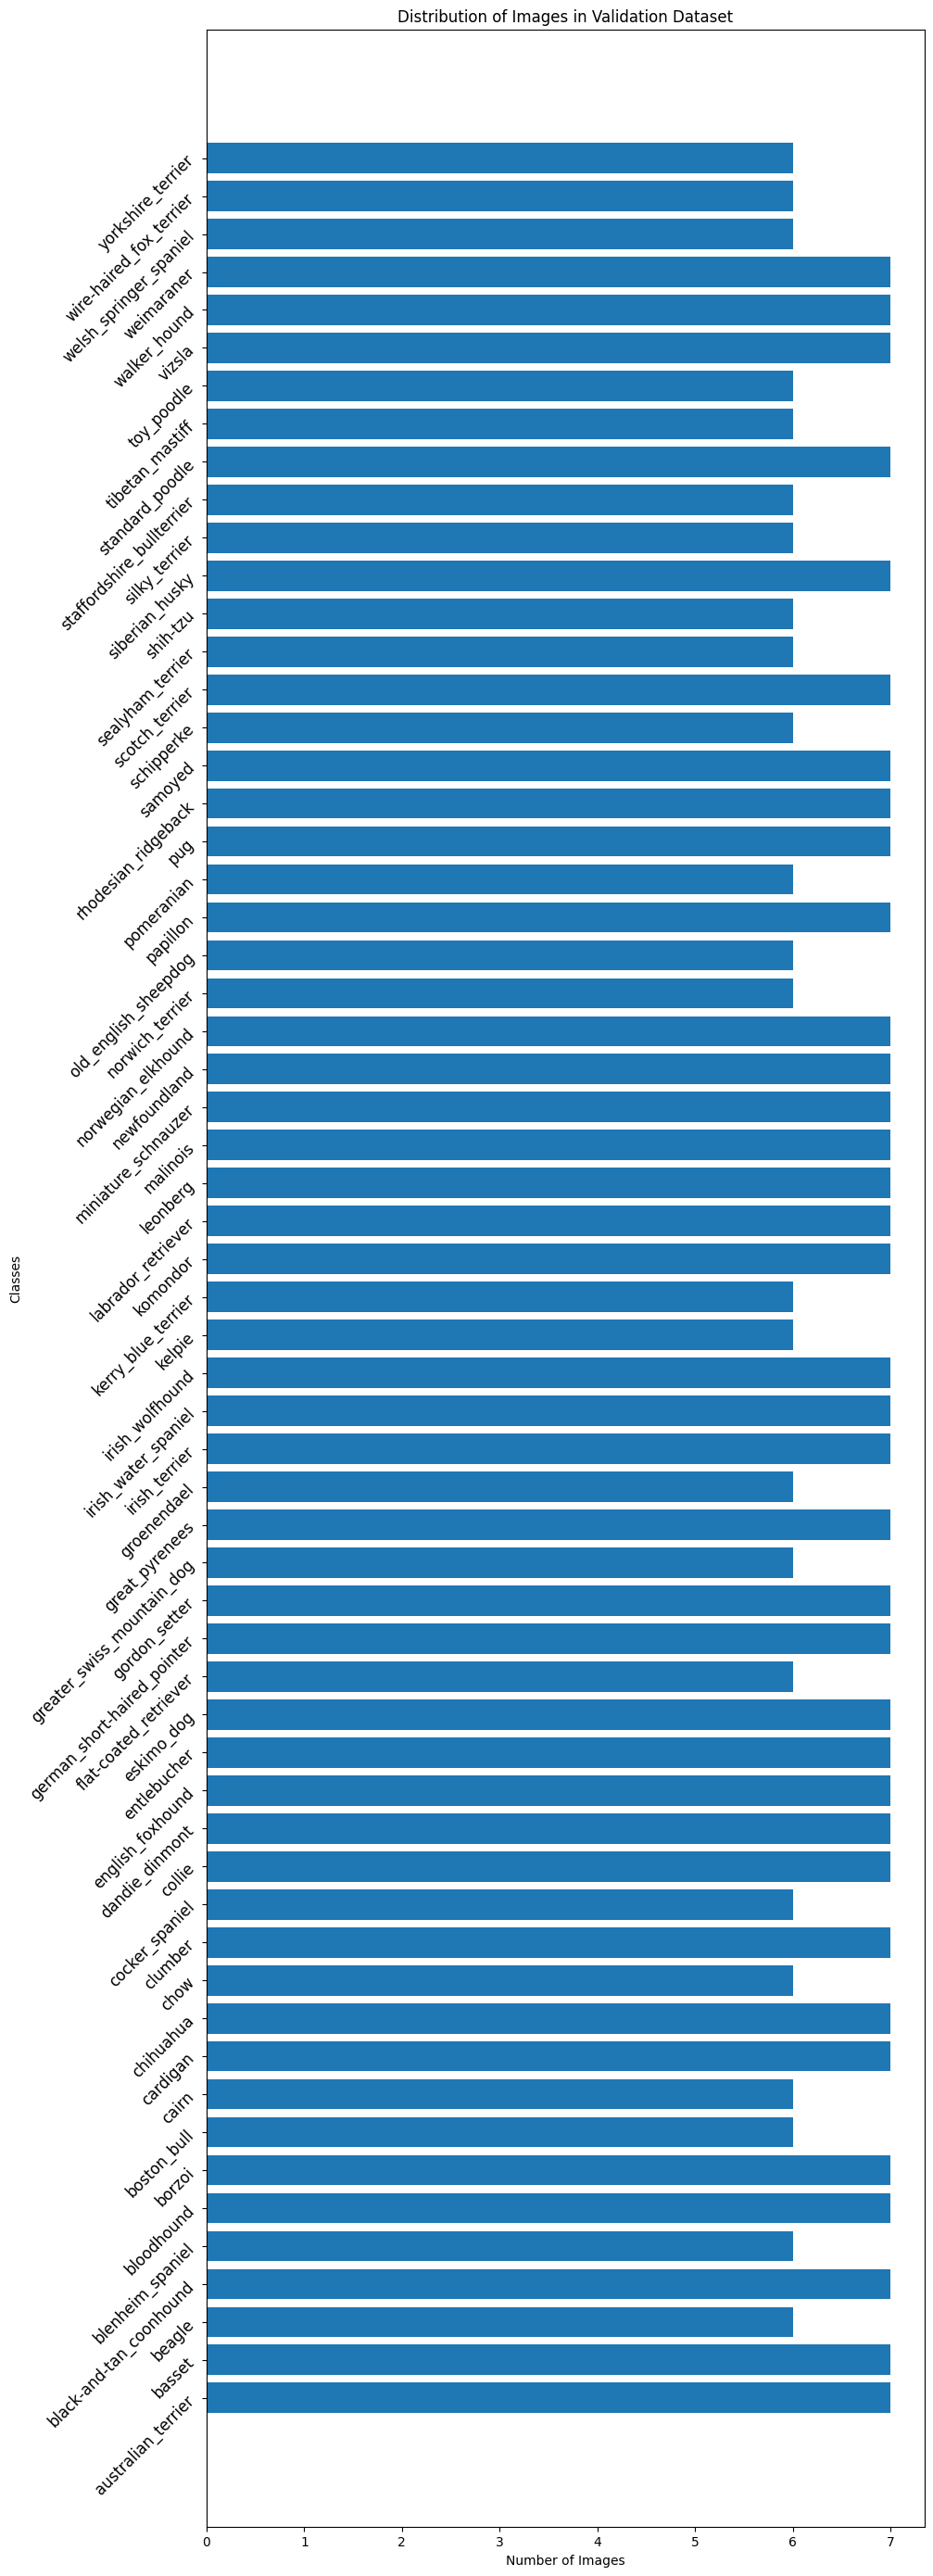

In [7]:
# Подсчет количества изображений в каждой папке
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            class_counts[class_name] = count
    return class_counts

train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)
validation_counts = count_images_per_class(validation_dir)

# Визуализация распределения изображений по классам
def plot_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 35))  # Увеличенный вертикальный размер для лучшей видимости
    plt.barh(classes, counts)
    plt.xlabel('Number of Images')
    plt.ylabel('Classes')
    plt.title(title)
    plt.yticks(rotation=45, fontsize=12)  # Поворот и изменение размера шрифта меток
    plt.show()

plot_class_distribution(train_counts, 'Distribution of Images in Train Dataset')
plot_class_distribution(test_counts, 'Distribution of Images in Test Dataset')
plot_class_distribution(validation_counts, 'Distribution of Images in Validation Dataset')

После небольшой реорганизации результаты стали гораздо лучше.

In [8]:
def save_breeds(directory, save_path):
    """
    Сохраняет список названий пород, найденных в указанной директории, в текстовый файл.

    """
    # Получаем список поддиректорий в указанной директории
    breeds = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
    breeds.sort()  # Опционально, сортировка списка
    
    # Сохраняем список пород в файл
    with open(save_path, 'w') as file:
        for breed in breeds:
            file.write(breed + '\n')

# Использование функции
 # Путь к тренировочной папке
save_path = os.path.join(base_dir, 'breeds_list.txt')# Путь к файлу для сохранения списка пород
save_breeds(train_dir, save_path)


In [10]:
import os
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import datetime

In [11]:
import tensorflow as tf
print(tf)

<module 'tensorflow' from 'C:\\Users\\nolik\\anaconda3\\envs\\new_env\\lib\\site-packages\\tensorflow\\__init__.py'>


In [12]:
print("Доступно GPU: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Доступно GPU:  1


In [13]:
if tensorflow.test.is_built_with_cuda():
    print("CUDA доступен и будет использован при обучении модели.")
else:
    print('CUDA недоступна, останавливаем программу...')

CUDA доступен и будет использован при обучении модели.


In [20]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tensorflow.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [21]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, 'dataset')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
model_dir = os.path.join(base_dir, 'models')
logs_dir = os.path.join(base_dir, 'logs')
os.makedirs(model_dir, exist_ok=True)
os.makedirs(logs_dir, exist_ok=True)

In [22]:
batch_size = 32
img_size = 299
model_name = 'model_bs'+str(batch_size)+'_img'+str(img_size)

In [23]:
# Создание объектов ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Генераторы данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)



Found 3168 images belonging to 60 classes.
Found 396 images belonging to 60 classes.


In [24]:
from PIL import Image
import scipy

In [28]:

# Загрузка InceptionV3 как основы
base_model = InceptionV3(weights='imagenet', include_top=False)

# Добавление новых слоев
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(60, activation='softmax')(x)  # 120 пород

# Сборка модели
model = Model(inputs=base_model.input, outputs=predictions)

# Замораживание всех слоев InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Компиляция модели
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


# Callback для сохранения лучшей модели
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Подготовка генераторов данных
train_steps = len(train_df) // batch_size
validation_steps = len(validation_df) // batch_size

# Обучение модели
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,  # Используем все доступные данные
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_steps,  # Используем все доступные данные
    callbacks=[checkpoint]
)



Epoch 1/20
99/99 [==============================] - 9s 74ms/step - loss: 5.7645 - accuracy: 0.2353 - val_loss: 2.0842 - val_accuracy: 0.4375
Epoch 2/20
99/99 [==============================] - 7s 67ms/step - loss: 2.2945 - accuracy: 0.4202 - val_loss: 1.7233 - val_accuracy: 0.5292
Epoch 3/20
99/99 [==============================] - 7s 67ms/step - loss: 1.9866 - accuracy: 0.4756 - val_loss: 1.5521 - val_accuracy: 0.5958
Epoch 4/20
99/99 [==============================] - 7s 66ms/step - loss: 1.9220 - accuracy: 0.4904 - val_loss: 1.6349 - val_accuracy: 0.6208
Epoch 5/20
99/99 [==============================] - 7s 70ms/step - loss: 1.7694 - accuracy: 0.5247 - val_loss: 1.5406 - val_accuracy: 0.5667
Epoch 6/20
99/99 [==============================] - 7s 70ms/step - loss: 1.7557 - accuracy: 0.5232 - val_loss: 1.4490 - val_accuracy: 0.5958
Epoch 7/20
99/99 [==============================] - 7s 67ms/step - loss: 1.6749 - accuracy: 0.5356 - val_loss: 1.5431 - val_accuracy: 0.6333
Epoch 8/20
99

In [29]:
# Размораживаем верхние слои
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# Повторная компиляция модели для дообучения
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,  # Используем все доступные данные
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_steps,  # Используем все доступные данные
    callbacks=[checkpoint]
)


Epoch 1/20
99/99 [==============================] - 11s 80ms/step - loss: 2.5135 - accuracy: 0.3308 - val_loss: 4.4408 - val_accuracy: 0.2792
Epoch 2/20
99/99 [==============================] - 7s 71ms/step - loss: 2.1051 - accuracy: 0.4101 - val_loss: 2.5613 - val_accuracy: 0.4542
Epoch 3/20
99/99 [==============================] - 7s 71ms/step - loss: 1.8243 - accuracy: 0.4783 - val_loss: 2.4925 - val_accuracy: 0.4583
Epoch 4/20
99/99 [==============================] - 7s 71ms/step - loss: 1.6777 - accuracy: 0.5147 - val_loss: 2.8223 - val_accuracy: 0.4042
Epoch 5/20
99/99 [==============================] - 7s 71ms/step - loss: 1.6163 - accuracy: 0.5288 - val_loss: 2.0567 - val_accuracy: 0.4750
Epoch 6/20
99/99 [==============================] - 7s 70ms/step - loss: 1.5025 - accuracy: 0.5631 - val_loss: 1.9722 - val_accuracy: 0.5208
Epoch 7/20
99/99 [==============================] - 7s 70ms/step - loss: 1.3735 - accuracy: 0.5732 - val_loss: 1.7452 - val_accuracy: 0.5667
Epoch 8/20
9

In [30]:
from tensorflow.keras.models import load_model

In [31]:
# Создание объекта ImageDataGenerator для тестового набора данных
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir= os.path.join(data_dir, 'test')

# Создание генератора данных для тестовых изображений
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

# Загрузка обученной модели
baest= os.path.join(base_dir, 'best_model.keras')
model = load_model(baest)
# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")


Found 396 images belonging to 60 classes.
20/20 [==============================] - 3s 91ms/step - loss: 1.5973 - accuracy: 0.5960
Test Accuracy: 59.60%
Test Loss: 1.5972599983215332


Путем невероятных манипуляций точность нашей нейросети 59%, что является неплохим результатом.
Теперь можем перейти к реализации пользовательского интерфейса, для удобства ее использования.

In [33]:
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

In [34]:
#Загрузка модели
baest= os.path.join(base_dir, 'best_model.keras')
model = load_model(baest)
results = []

def load_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

def predict(img_path):
    img_array = load_image(img_path)
    preds = model.predict(img_array)
    predicted_class = np.argmax(preds[0])
    return predicted_class

# Список пород собак
def load_breeds(file_path):
    with open(file_path, 'r') as file:
        breeds = file.read().splitlines()
    return breeds

# Загрузка списка пород
breeds_file_path =  os.path.join(data_dir, 'breeds_list.txt') # Путь к файлу со списком пород
breeds = load_breeds(breeds_file_path)


def open_file():
    filepath = filedialog.askopenfilename(
        title="Open file",
        filetypes=[("Image Files", "*.png *.jpg *.jpeg")]
    )
    if not filepath:
        return
    
    correct_breed = os.path.basename(os.path.dirname(filepath))
    predicted_class = predict(filepath)
    predicted_breed = breeds[predicted_class]

    if predicted_breed == correct_breed:
        color = 'green'
    else:
        color = 'red'

    result_text = f"Predicted breed: {predicted_breed}\nCorrect breed: {correct_breed}"
    label.config(text=result_text, fg=color)

    img = Image.open(filepath)
    img = img.resize((250, 250), Image.LANCZOS)
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

    # Сохраняем результаты для Jupyter
    results.append((filepath, result_text))



# Создание GUI
def load_display_image(img_path):
    img = Image.open(img_path)
    img = img.resize((250, 250), Image.LANCZOS)  # Изменяем размер для отображения
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img  # Сохраняем ссылку на изображение

root = tk.Tk()
root.title("Dog Breed Predictor")
root.geometry("500x600")  # Размер окна

btn_open = tk.Button(root, text="Open Image", command=open_file)
btn_open.pack(pady=20)

label = tk.Label(root, text="Select an image")
label.pack(pady=20)

image_label = tk.Label(root)  # Метка для отображения изображения
image_label.pack(pady=20)

root.mainloop()

1/1 [==============================] - 0s 19ms/step


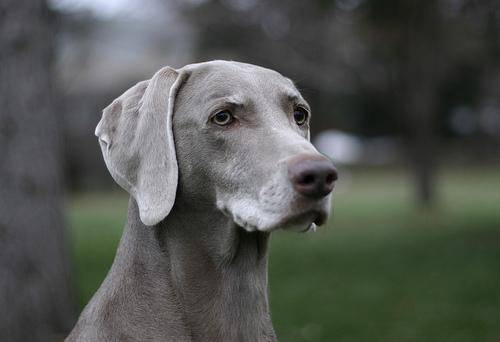

Predicted breed: weimaraner
Correct breed: weimaraner


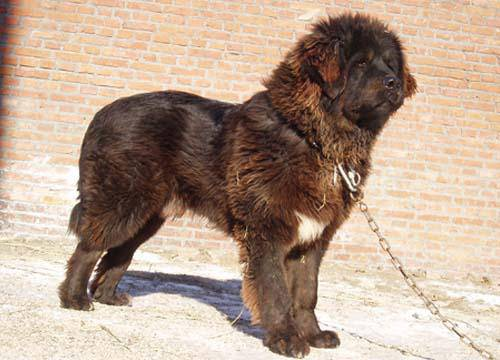

Predicted breed: leonberg
Correct breed: tibetan_mastiff


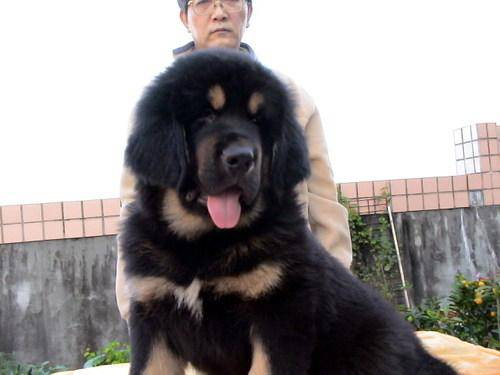

Predicted breed: tibetan_mastiff
Correct breed: tibetan_mastiff


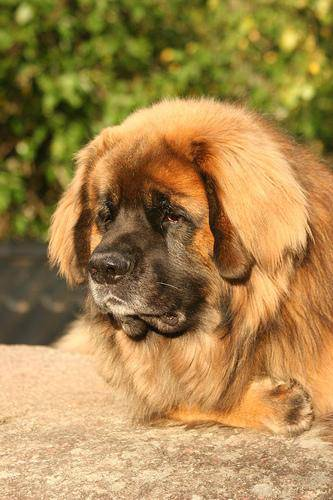

Predicted breed: leonberg
Correct breed: leonberg


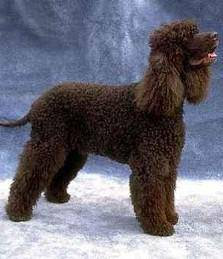

Predicted breed: irish_water_spaniel
Correct breed: irish_water_spaniel


In [35]:
# Вывод результатов после использования GUI
from IPython.display import display, Image as IPImage
for filepath, breed in results:
    display(IPImage(filename=filepath, width=250, height=250))
    print(breed)